In [35]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


In [5]:
class K_Means:
    
    def __init__(self, n_clusters=8, tol=0.001, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, X):
        
        n = X.shape[0] 
        m = X.shape[1]
        
        mean = np.mean(X, axis = 0)
        std = np.std(X, axis = 0)
        self.cluster_centers_ = np.random.randn(self.n_clusters, m) * std + mean
        
        self.labels_ = np.zeros(n)
        distances = np.zeros((n, self.n_clusters))
        
        
        self.n_iter_ = 0
        for i in range(self.max_iter):
            self.n_iter_ = i
            
            for j in range(self.n_clusters):
                distances[:,j] = np.sum(((X - self.cluster_centers_[j])**2), axis=1)**(1/2)
                           
            self.labels_ = np.argmin(distances, axis=1)
            
            for j in range(self.n_clusters):
                if j not in self.labels_: 
                    self.labels_[random.randint(0, n-1)] = j
            
                
            prev_cluster_centers = np.copy(self.cluster_centers_)
            
            for j in range(self.n_clusters):
                self.cluster_centers_[j] = np.mean(X[self.labels_ == j], axis=0)
                
            err = 0
            for j in range(self.n_clusters):
                err = err + np.sum(((prev_cluster_centers[j] - self.cluster_centers_[j])**2), axis=0)**(1/2)
                
            if err < self.tol:
                break
        
                
    def predict(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for j in range(self.n_clusters):
            distances[:,j] = np.sum(((X - self.cluster_centers_[j])**2), axis=1)**(1/2)
        classification = np.argmin(distances, axis=1)
        return classification

In [6]:
df = load_iris()

In [7]:
len(df.data)

150

In [8]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
X = df['data']
y = df['target']

Text(0, 0.5, 'Sepal Width')

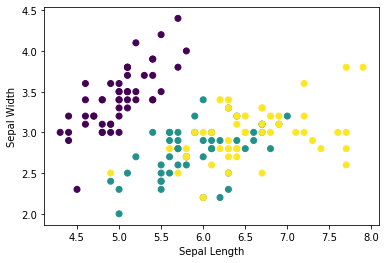

In [12]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

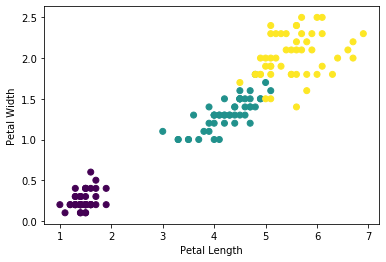

In [16]:
plt.scatter(X[:,2], X[:,3], c=y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [17]:
model = K_Means(n_clusters=3)
model.fit(X)

In [18]:
model.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [19]:
centers = model.cluster_centers_
print(centers)

[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]]


In [20]:
new_labels = model.labels_
print(new_labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


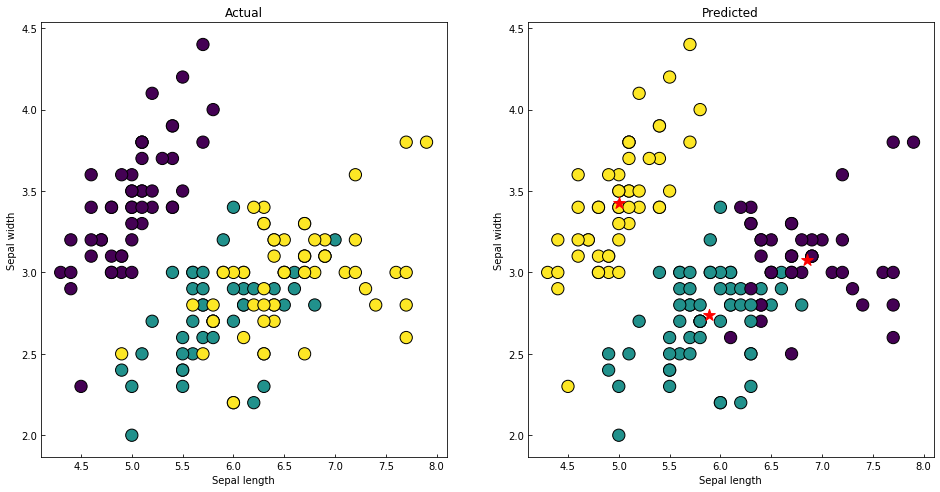

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 0], X[:, 1], c=y,
edgecolor='k', s=150)

axes[1].scatter(X[:, 0], X[:, 1], c=new_labels,
edgecolor='k', s=150)
axes[1].scatter(centers[:,0], centers[:,1], marker='*', c='r', s=150)

axes[0].set_xlabel('Sepal length')
axes[0].set_ylabel('Sepal width')

axes[1].set_xlabel('Sepal length')
axes[1].set_ylabel('Sepal width')

axes[0].tick_params(direction='in')
axes[1].tick_params(direction='in')

axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

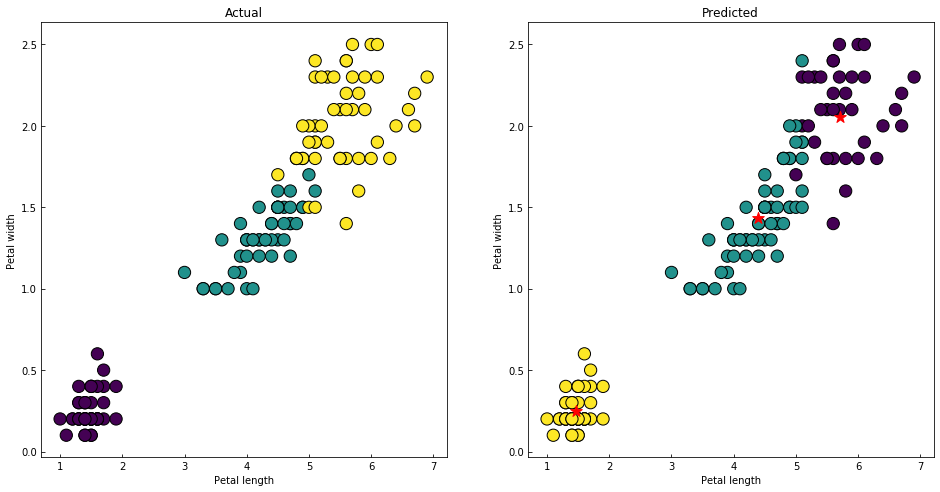

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y,
edgecolor='k', s=150)

axes[1].scatter(X[:, 2], X[:, 3], c=new_labels,
edgecolor='k', s=150)
axes[1].scatter(centers[:,2], centers[:,3], marker='*', c='r', s=150)

axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')

axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')

axes[0].tick_params(direction='in')
axes[1].tick_params(direction='in')

axes[0].set_title('Actual')
axes[1].set_title('Predicted')
plt.show()

In [28]:
range_n_clusters = [2, 3, 4, 5, 6]

In [39]:
def plot_silhouette(n_clusters, clusterer):
       # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3648340039670018


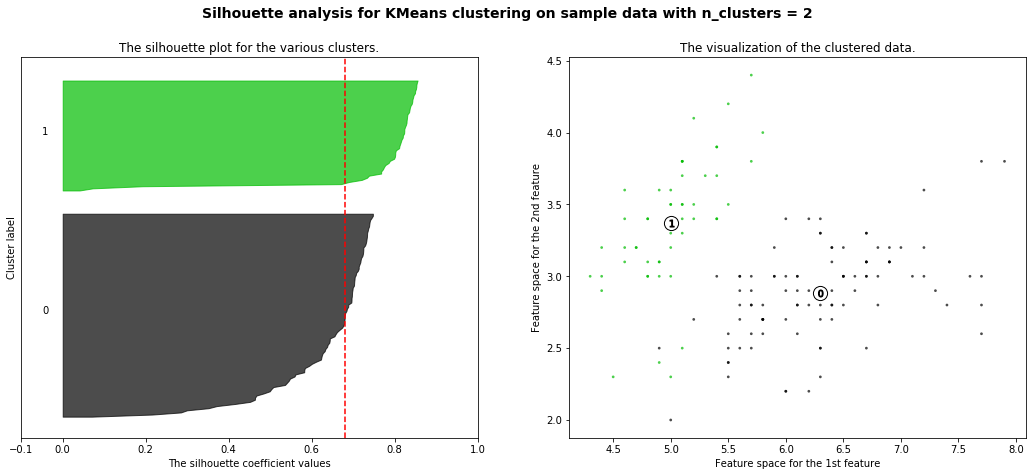

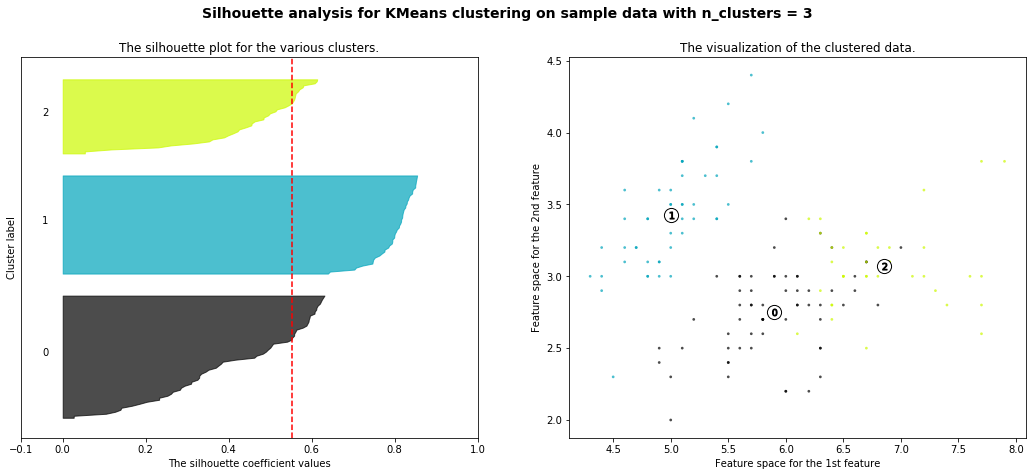

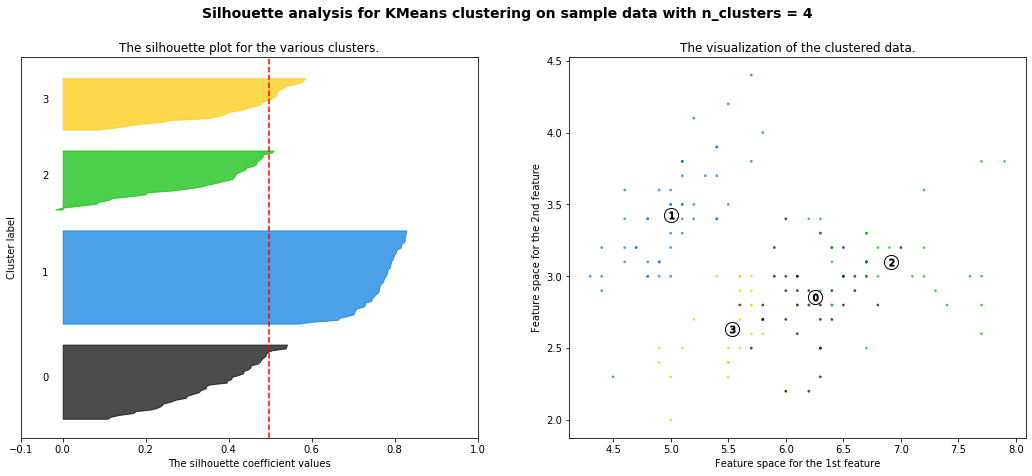

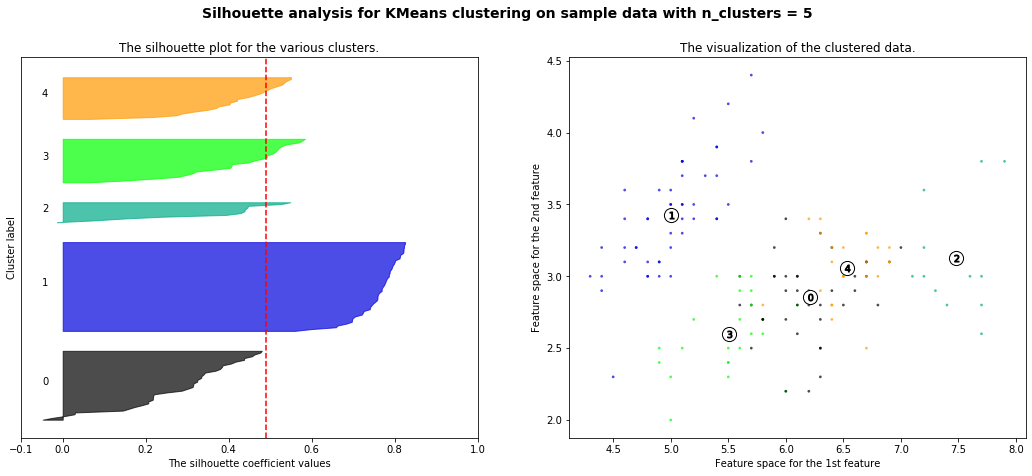

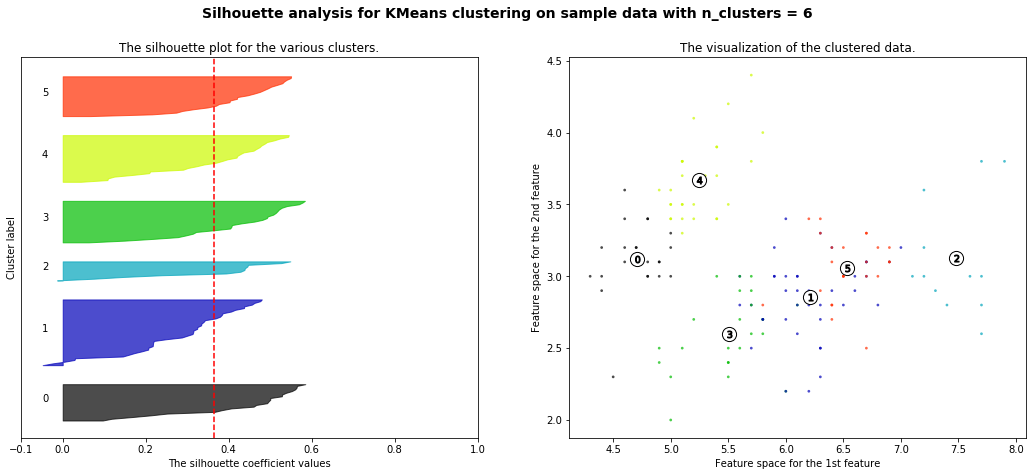

In [40]:
for n_clusters in range_n_clusters:
    clusterer = K_Means(n_clusters=n_clusters)
    plot_silhouette(n_clusters, clusterer)